In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [7]:
import plotly.express as px

# List of categorical columns to analyze
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'InternetService', 'MultipleLines', 'OnlineSecurity',
                       'OnlineBackup', 'TechSupport', 'StreamingMovies', 'PaperlessBilling',
                       'PaymentMethod', 'StreamingTV', 'Contract','Churn']

# Melt the dataframe for Plotly
melted_df = df[categorical_columns].melt(var_name='Column', value_name='Category')

# Calculate counts
category_counts = (
    melted_df.groupby(['Column', 'Category'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentages
category_counts['Percentage'] = (
    category_counts['Count'] / category_counts.groupby('Column')['Count'].transform('sum') * 100
)

# Create a bar chart
fig = px.bar(category_counts, x='Column', y='Percentage', color='Category',
             title='Categorical Column Distributions (Percentage)',
             barmode='stack', text=category_counts['Percentage'].round(1), height=600)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Columns",
    yaxis_title="Percentage",
    legend_title="Categories",
    uniformtext_minsize=8,
    uniformtext_mode='hide'  # Avoid cluttered text if labels are too small
)

fig.show()



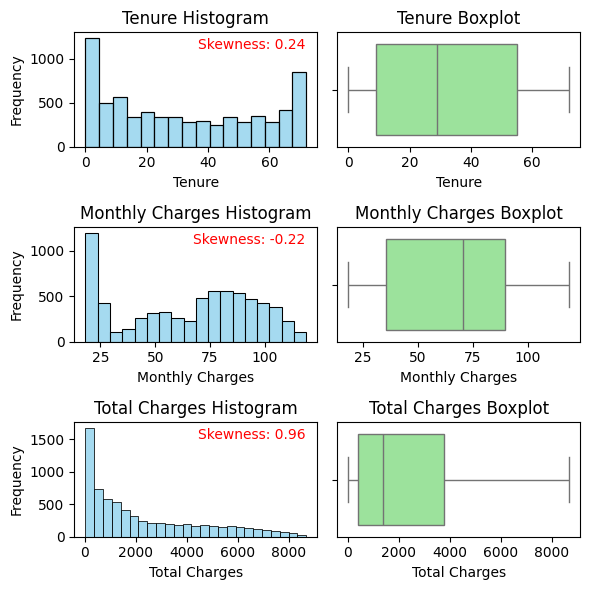

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
titles = ['Tenure', 'Monthly Charges', 'Total Charges']
colors = ['skyblue', 'skyblue', 'skyblue']
box_colors = ['lightgreen', 'lightgreen', 'lightgreen']

# Set up the figure with a 3-row layout
fig, axes = plt.subplots(len(variables), 2, figsize=(6, 6))

for i, var in enumerate(variables):
    # Histogram
    sns.histplot(df[var], ax=axes[i, 0], color=colors[i])
    axes[i, 0].set_title(f'{titles[i]} Histogram')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_xlabel(titles[i])

    # Calculate and annotate skewness
    skewness = df[var].skew()
    axes[i, 0].text(0.95, 0.95, f'Skewness: {skewness:.2f}',
                    transform=axes[i, 0].transAxes, fontsize=10, color='red',
                    ha='right', va='top')

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1], color=box_colors[i], flierprops={
        'marker': 'o', 'color': 'red', 'markersize': 6
    })
    axes[i, 1].set_title(f'{titles[i]} Boxplot')
    axes[i, 1].set_xlabel(titles[i])

# Adjust layout for clarity
plt.tight_layout()

# Save the figure
plt.savefig("visualization.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()


In [9]:
import numpy as np
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])

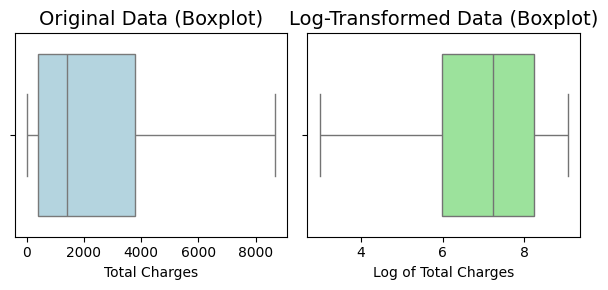

Original skewness: 0.96
Log-transformed skewness: -0.74


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Original data boxplot
sns.boxplot(data=df, x='TotalCharges', ax=axes[0], color='lightblue')
axes[0].set_title('Original Data (Boxplot)', fontsize=14)
axes[0].set_xlabel('Total Charges')

# Log-transformed data boxplot
sns.boxplot(data=df, x='TotalCharges_log', ax=axes[1], color='lightgreen')
axes[1].set_title('Log-Transformed Data (Boxplot)', fontsize=14)
axes[1].set_xlabel('Log of Total Charges')

plt.tight_layout()
plt.show()

print(f"Original skewness: {df['TotalCharges'].skew():.2f}")
print(f"Log-transformed skewness: {df['TotalCharges_log'].skew():.2f}")

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_log'],
      dtype='object')

In [12]:
import pandas as pd
import plotly.express as px

# Define the categorical columns
categorical_columns = [
                       'PaymentMethod', 'Partner', 'Dependents','PaperlessBilling','PhoneService','MultipleLines']

# Add 'Churn' to the columns of interest
columns_with_churn = categorical_columns + ['Churn']

# Melt the dataframe for Plotly
melted_df = df[columns_with_churn].melt(id_vars='Churn', var_name='Column', value_name='Category')

# Calculate counts by Churn
category_churn_counts = (
    melted_df.groupby(['Column', 'Category', 'Churn'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentages within each Churn group
category_churn_counts['Percentage'] = (
    category_churn_counts['Count'] / category_churn_counts.groupby(['Column', 'Category'])['Count'].transform('sum') * 100
)

# Create a bar chart with Churn as color
fig = px.bar(
    category_churn_counts,
    x='Category',
    y='Percentage',
    color='Churn',
    facet_col='Column',
    title='Relationship Between Categorical Columns and Churn',
    barmode='stack',
    text=category_churn_counts['Percentage'].round(1),
    height=700,  # Decrease the overall chart height
    facet_col_wrap=3,  # Increase the number of columns per row
    color_discrete_map={0: 'green', 1: 'yellow'}  # Custom colors for 'No Churn' (0) and 'Churn' (1)
)

# Update layout to add column names as facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Update layout to reduce font size and adjust spacing
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Percentage",
    legend_title="Churn",
    uniformtext_minsize=6,  # Smaller text size for bars
    uniformtext_mode='hide',
    margin=dict(l=10, r=10, t=30, b=30),  # Reduce margins
    font=dict(size=10),  # Reduce font size for titles and labels
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()





In [13]:
# List of categorical columns you want to analyze
categorical_columns = [ 'StreamingTV', 'StreamingMovies',
       'OnlineSecurity', 'OnlineBackup', 'Contract', 'InternetService']


# Add 'Churn' to the columns of interest
columns_with_churn = categorical_columns + ['Churn']

# Melt the dataframe for Plotly
melted_df = df[columns_with_churn].melt(id_vars='Churn', var_name='Column', value_name='Category')

# Calculate counts by Churn
category_churn_counts = (
    melted_df.groupby(['Column', 'Category', 'Churn'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentages within each Churn group
category_churn_counts['Percentage'] = (
    category_churn_counts['Count'] / category_churn_counts.groupby(['Column', 'Category'])['Count'].transform('sum') * 100
)

# Create a bar chart with Churn as color
fig = px.bar(
    category_churn_counts,
    x='Category',
    y='Percentage',
    color='Churn',
    facet_col='Column',
    title='Relationship Between Categorical Columns and Churn',
    barmode='stack',
    text=category_churn_counts['Percentage'].round(1),
    height=700,  # Decrease the overall chart height
    facet_col_wrap=3,  # Increase the number of columns per row
    color_discrete_map={0: 'green', 1: 'yellow'}  # Custom colors for 'No Churn' (0) and 'Churn' (1)
)

# Update layout to add column names as facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Update layout to reduce font size and adjust spacing
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Percentage",
    legend_title="Churn",
    uniformtext_minsize=6,  # Smaller text size for bars
    uniformtext_mode='hide',
    margin=dict(l=10, r=10, t=30, b=30),  # Reduce margins
    font=dict(size=10),  # Reduce font size for titles and labels
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()




In [14]:
# List of categorical columns you want to analyze
categorical_columns = ['DeviceProtection', 'TechSupport']


# Add 'Churn' to the columns of interest
columns_with_churn = categorical_columns + ['Churn']

# Melt the dataframe for Plotly
melted_df = df[columns_with_churn].melt(id_vars='Churn', var_name='Column', value_name='Category')

# Calculate counts by Churn
category_churn_counts = (
    melted_df.groupby(['Column', 'Category', 'Churn'])
    .size()
    .reset_index(name='Count')
)

# Calculate percentages within each Churn group
category_churn_counts['Percentage'] = (
    category_churn_counts['Count'] / category_churn_counts.groupby(['Column', 'Category'])['Count'].transform('sum') * 100
)

# Create a bar chart with Churn as color
fig = px.bar(
    category_churn_counts,
    x='Category',
    y='Percentage',
    color='Churn',
    facet_col='Column',
    title='Relationship Between Categorical Columns and Churn',
    barmode='stack',
    text=category_churn_counts['Percentage'].round(1),
    height=400,  # Decrease the overall chart height
    facet_col_wrap=2,  # Increase the number of columns per row
    color_discrete_map={0: 'green', 1: 'yellow'}  # Custom colors for 'No Churn' (0) and 'Churn' (1)
)

# Update layout to add column names as facet titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Update layout to reduce font size and adjust spacing
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Percentage",
    legend_title="Churn",
    uniformtext_minsize=6,  # Smaller text size for bars
    uniformtext_mode='hide',
    margin=dict(l=10, r=10, t=30, b=30),  # Reduce margins
    font=dict(size=10),  # Reduce font size for titles and labels
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()




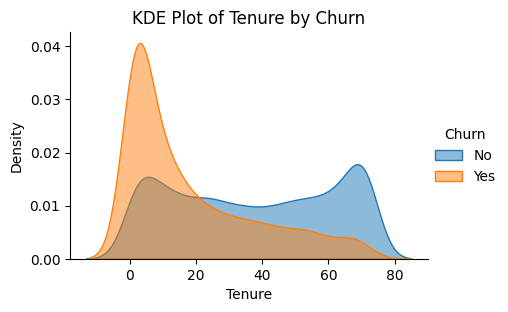

In [15]:
g = sns.FacetGrid(df, hue='Churn', height=3, aspect=1.5)
g.map(sns.kdeplot, 'tenure', fill=True, alpha=0.5)
g.add_legend()
g.set_axis_labels('Tenure', 'Density')
plt.title('KDE Plot of Tenure by Churn')
plt.show()

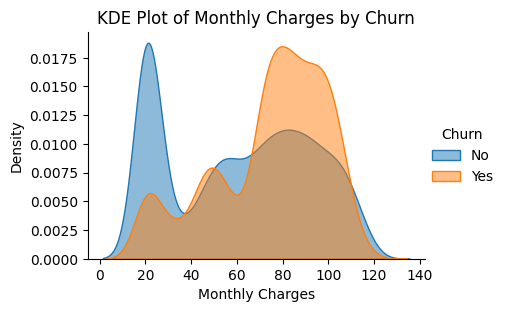

In [16]:
g = sns.FacetGrid(df, hue='Churn', height=3, aspect=1.5)
g.map(sns.kdeplot, 'MonthlyCharges', fill=True, alpha=0.5)
g.add_legend()
g.set_axis_labels('Monthly Charges', 'Density')
plt.title('KDE Plot of Monthly Charges by Churn')
plt.show()

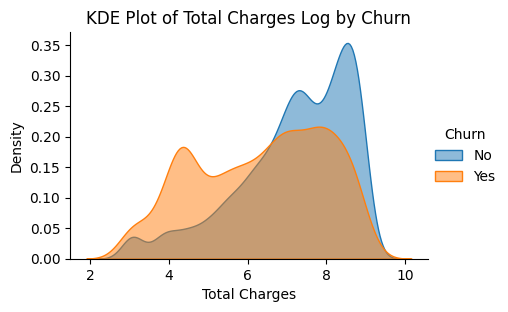

In [17]:
g = sns.FacetGrid(df, hue='Churn', height=3, aspect=1.5)
g.map(sns.kdeplot, 'TotalCharges_log', fill=True, alpha=0.5)
g.add_legend()
g.set_axis_labels('Total Charges', 'Density')
plt.title('KDE Plot of Total Charges Log by Churn')
plt.show()

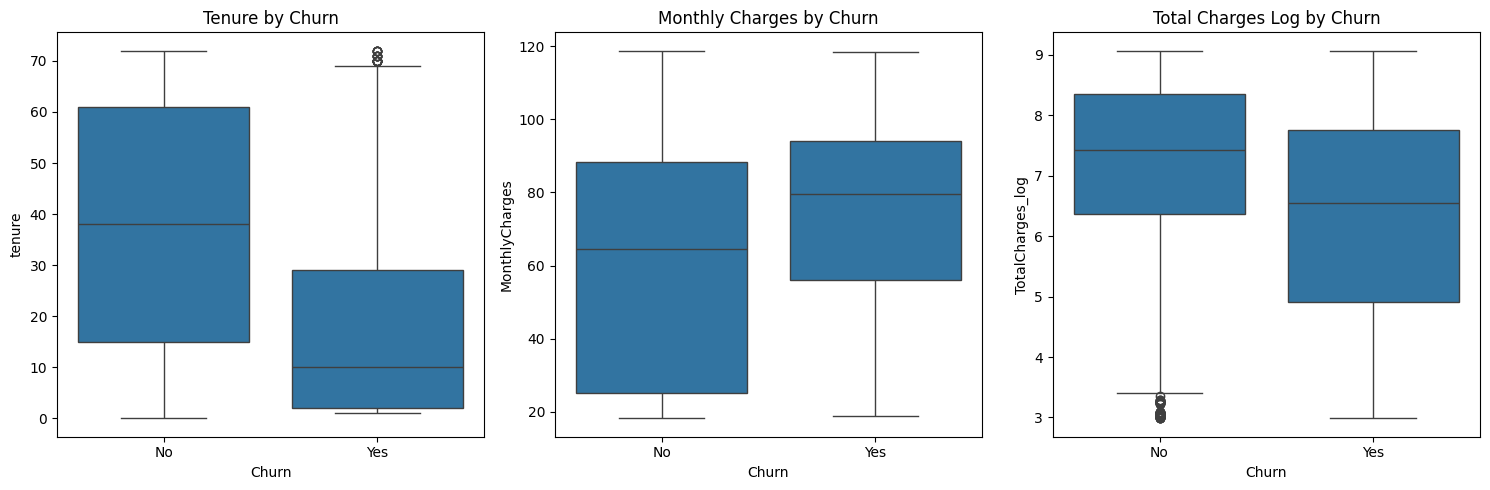

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single row of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for tenure by Churn
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0])
axes[0].set_title('Tenure by Churn')

# Boxplot for Monthly Charges by Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')

# Boxplot for Total Charges by Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges_log', ax=axes[2])
axes[2].set_title('Total Charges Log by Churn')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
print(df.columns)
df = df.drop(columns=['customerID'])
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_log'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_log'],
      dtype='object')


In [20]:
label_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_log']
for col in label_cols:
  print(f"{col} : {df[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [21]:
#Feature Engineering

internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies']
df[internet_service_cols] = df[internet_service_cols].replace('No internet service', 'No')


df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')


df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)':'automatic','Credit card (automatic)':'automatic'})



labels = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges_log', 'Churn']
for col in labels:
  print(f"{col} : {df[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'automatic']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges_log : [3.42913675 7.54459662 4.69272308 ... 5.85062077 5.72880024 8.83134678]
Churn : ['No' 'Yes']


In [22]:
#Changing Binary Columns

binary_cols = ['Partner', 'Dependents',
       'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies','PaperlessBilling','Churn','MultipleLines']

for col in binary_cols:
  df[col]=df[col].replace({'Yes':1,'No':0})

df['gender'] = df['gender'].replace({'Female':0,'Male':1})

labels = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges_log', 'Churn']
for col in labels:
  print(f"{col} : {df[col].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'automatic']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges_log : [3.42913675 7.54459662 4.69272308 ... 5.85062077 5.72880024 8.83134678]
Churn : [0 1]


<ipython-input-22-1bf826f3da69>:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-22-1bf826f3da69>:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_log'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Specify columns to encode
columns_to_encode = ['Contract', 'PaymentMethod', 'InternetService']

# Perform one-hot encoding without dropping any category
df_encoded = pd.get_dummies(df[columns_to_encode], drop_first=False)

# Drop the original columns before concatenation
df = df.drop(columns=columns_to_encode)

# Concatenate the encoded columns back into the DataFrame
df = pd.concat([df, df_encoded], axis=1)

# View updated columns
print("Updated DataFrame columns:")
print(df.columns)

Updated DataFrame columns:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_log', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_automatic',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


In [25]:
co = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_log', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_automatic',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No']
for c in co:
  print(f"{c} : {df[c].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
TotalCharges_log : [3.42913675 7.54459662 4.69272308 ... 5.85062077 5.72880024 8.83134678]
Contract_Month-to-month : [ True False]
Contract_One year : [False  True]
Contract_Two year : [False  True]
PaymentMethod_Electronic check : [ True False]
PaymentMethod_Mailed check : [False  True]
PaymentMethod_automatic : [False  True]
InternetService_DSL : [

In [26]:
# Convert boolean to integer (0 and 1)
df['Contract_One year'] = df['Contract_One year'].astype(int)
df['Contract_Two year'] = df['Contract_Two year'].astype(int)
df['Contract_Month-to-month'] = df['Contract_Month-to-month'].astype(int)
df['PaymentMethod_Mailed check'] = df['PaymentMethod_Mailed check'].astype(int)
df['PaymentMethod_automatic'] = df['PaymentMethod_automatic'].astype(int)
df['PaymentMethod_Electronic check'] = df['PaymentMethod_Electronic check'].astype(int)
df['InternetService_Fiber optic'] = df['InternetService_Fiber optic'].astype(int)
df['InternetService_No'] = df['InternetService_No'].astype(int)
df['InternetService_DSL'] = df['InternetService_DSL'].astype(int)

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_log', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_automatic',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [28]:
co = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_log', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_automatic',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No']
for c in co:
  print(f"{c} : {df[c].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
TotalCharges_log : [3.42913675 7.54459662 4.69272308 ... 5.85062077 5.72880024 8.83134678]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]
PaymentMethod_automatic : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Interne

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges_log']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges_log']])

In [30]:
df.drop(columns=['TotalCharges'], inplace=True)


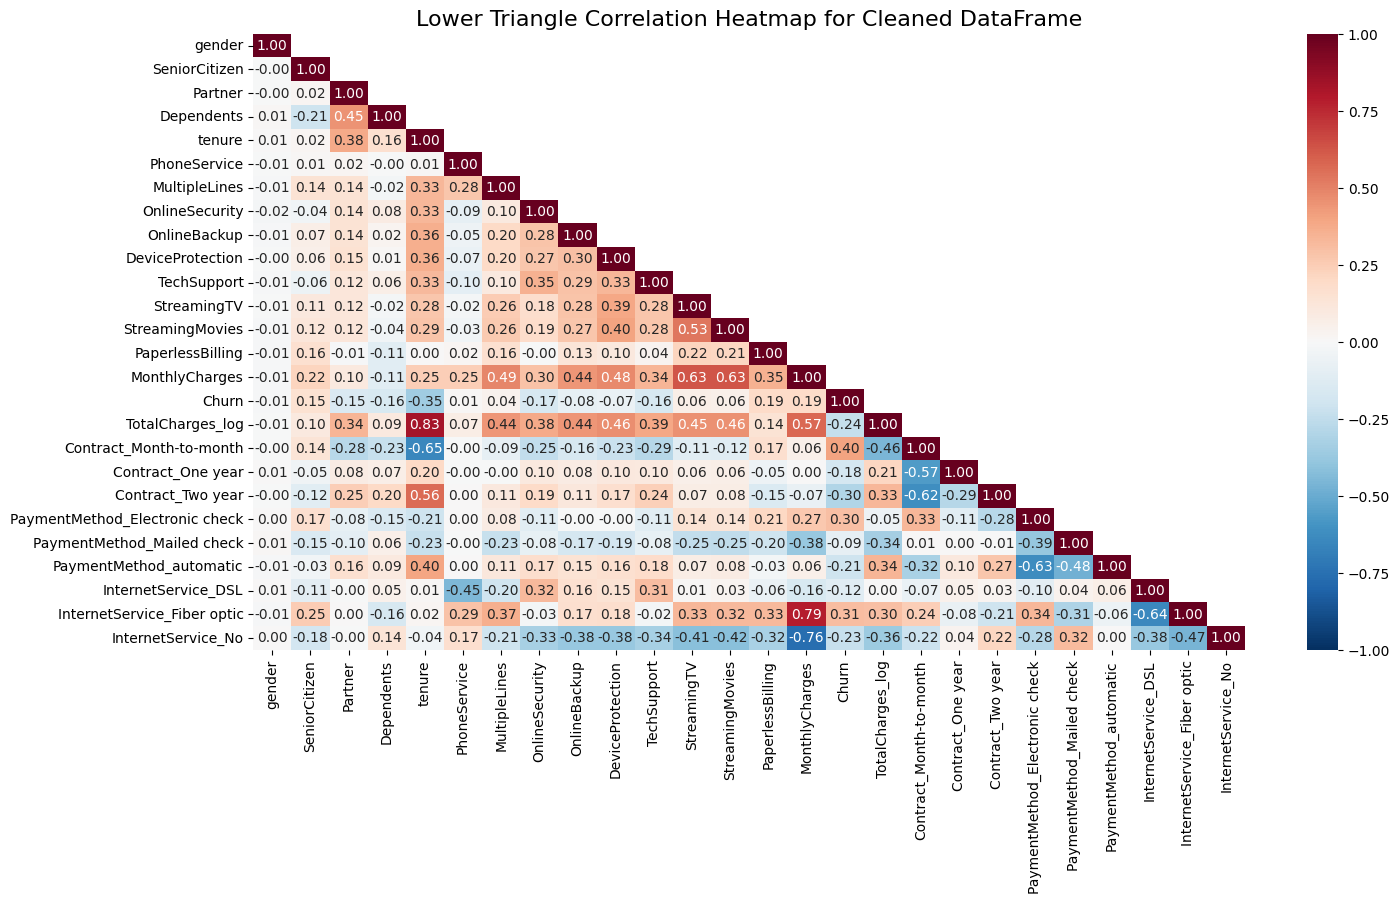

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Replace spaces or invalid values with NaN in all columns
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Convert all columns to numeric where possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (optional: depending on data requirements)
df.dropna(inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Generate the heatmap with the mask applied
plt.figure(figsize=(16, 8))

sns.heatmap(
    corr_matrix,
    mask=mask,  # Apply the mask
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",  # Diverging colormap for better distinction
    vmin=-1, vmax=1,  # Explicitly define the range for correlation values
    annot_kws={"size": 10}  # Adjust font size for annotations
)


plt.title("Lower Triangle Correlation Heatmap for Cleaned DataFrame", fontsize=16)


# Save the heatmap as an image
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")  # Save as PNG with high resolution

# Show the heatmap
plt.show()


In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'TotalCharges_log',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaymentMethod_automatic', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [33]:
df.drop(columns=['SeniorCitizen'], inplace=True)
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['DeviceProtection'], inplace=True)
df.drop(columns=['Partner'], inplace=True)
df.drop(columns=['tenure'], inplace=True)
df.columns

Index(['Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'TotalCharges_log',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaymentMethod_automatic', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Step 1: Prepare your data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Step 5: Train and evaluate each model
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Ensure the model has predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc = roc_auc_score(y_test, y_prob)  # Calculate AUC
    else:
        y_prob = None
        auc = None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    if auc is not None:
        print(f"AUC: {auc:.2f}")
    print(classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 0.79
AUC: 0.84
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Decision Tree:
Accuracy: 0.74
AUC: 0.67
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407


Random Forest:
Accuracy: 0.77
AUC: 0.80
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.58      0.49      0.53       374

    accuracy                           0.77      1407

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.79
AUC: 0.84
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<ipython-input-35-03647cd1d2cf>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-03647cd1d2cf>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




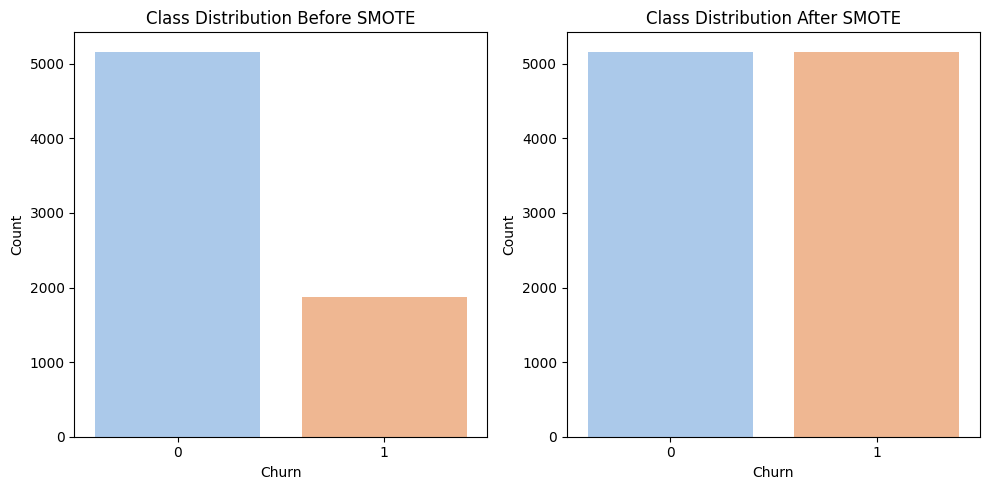


Logistic Regression:
Accuracy: 0.79
AUC: 0.87
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1037
           1       0.77      0.83      0.80      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066


Decision Tree:
Accuracy: 0.78
AUC: 0.78
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1037
           1       0.77      0.79      0.78      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066


Naive Bayes:
Accuracy: 0.77
AUC: 0.84
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1037
           1       0.74      0.81      0.78      1029

    accuracy                           0.77      2066
 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import pandas as pd

# Assuming `df` is your DataFrame already loaded and prepared

# Step 1: Prepare your data
X = df.drop('Churn', axis=1)
y = df['Churn']



# Step 2: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize class distribution before and after SMOTE in a single row

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before SMOTE
sns.countplot(x=y, ax=axes[0], palette="pastel")
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# After SMOTE
sns.countplot(x=y_resampled, ax=axes[1], palette="pastel")
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42, algorithm="SAMME")
}

# Step 5: Train and evaluate each model
model_results = {}

for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate probabilities for AUC
    if hasattr(model, "predict_proba"):  # Ensure the model supports predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc = roc_auc_score(y_test, y_prob)  # Calculate AUC
    else:
        y_prob = None
        auc = None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    if auc is not None:
        print(f"AUC: {auc:.2f}")
    print(classification_report(y_test, y_pred))

Class distribution after SMOTE: Counter({0: 5163, 1: 5163})

Random Forest:
Accuracy: 0.84
AUC: 0.91
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1037
           1       0.82      0.86      0.84      1029

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066


Feature Importance (Random Forest):
                           Feature  Importance
10                TotalCharges_log    0.266389
9                   MonthlyCharges    0.241981
11         Contract_Month-to-month    0.101964
13               Contract_Two year    0.052626
18     InternetService_Fiber optic    0.038204
3                   OnlineSecurity    0.030374
14  PaymentMethod_Electronic check    0.028920
5                      TechSupport    0.028389
0                       Dependents    0.027204
8                 PaperlessBilling    0.025294
4                 

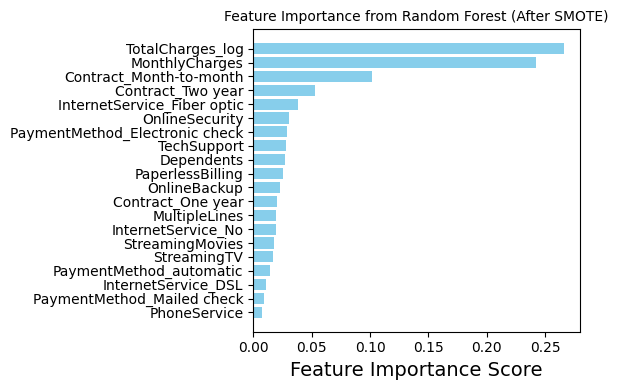

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from collections import Counter
import pandas as pd

# Assume `X` is your feature matrix and `y` is the target variable

# Step 1: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y_resampled))

# Step 2: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {

    "Random Forest": RandomForestClassifier(random_state=42)
}

# Step 4: Train and evaluate each model
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate probabilities for AUC (if applicable)
    if hasattr(model, "predict_proba"):  # Ensure the model supports predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    if auc is not None:
        print(f"AUC: {auc:.2f}")
    print(classification_report(y_test, y_pred))

# Step 5: Extract feature importance for Random Forest
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Display feature importance
    print("\nFeature Importance (Random Forest):")
    print(feature_importance)

# Step 5: Visualize important features
plt.figure(figsize=(6, 4))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score", fontsize=14)
plt.title("Feature Importance from Random Forest (After SMOTE)", fontsize=10)
plt.gca().invert_yaxis()  # Most important feature on top
plt.tight_layout()
plt.show()

